<div class="alert alert-block alert-success">
<b><h3>AIM:</h3></b> Demonstrate the use of Logistic Regression on data sets used in experiment No.3 and compare with results of linear regression
</div>

## **Logistic Regression in Machine Learning**
    • Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.
    • Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
    • Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.
    • In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).
    • The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.
    • Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.
    • Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification.

The below image is showing the logistic function:

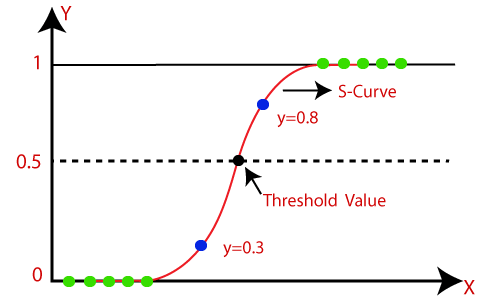

**Logistic Function (Sigmoid Function):**
 <ul>
    <li>The sigmoid function is a mathematical function used to map the predicted values to probabilities.</li>
    <li>It maps any real value into another value within a range of 0 and 1.</li>
    <li>The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the "S" form. The S-form curve is called the Sigmoid function or the logistic function</li>
    <li>In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0. </li>
</ul>


**Assumptions for Logistic Regression:**
<ul>
    <li>The dependent variable must be categorical in nature.</li>
    <li>The independent variable should not have multi-collinearity.</li>
    </ul>

**Logistic Regression Equation:**
The Logistic regression equation can be obtained from the Linear Regression equation. The mathematical steps to get Logistic Regression equations are given below
 

We know the equation of the straight line can be written as:

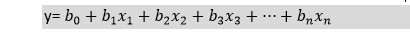

In Logistic Regression y can be between 0 and 1 only, so for this let's divide the above equation by (1-y)

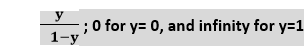



But we need range between -[infinity] to +[infinity], then take logarithm of the equation it will become:

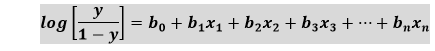

The above equation is the final equation for Logistic Regression.

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize the logistic regression model
model = LogisticRegression()

In [6]:
# Fit the model on the training data
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [8]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

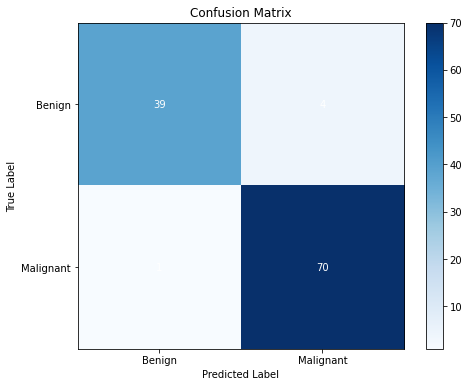

In [9]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')
plt.show()

In [10]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc

In [12]:
# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]

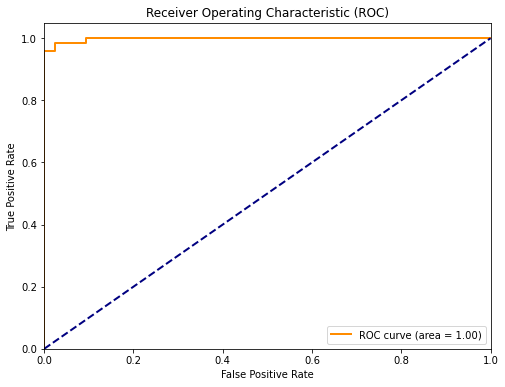

In [13]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [14]:
# Display classification report
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [17]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [27]:
# Generating sample dataset
np.random.seed(0)
num_students = 1000
maths = np.random.randint(0, 101, num_students)
physics = np.random.randint(0, 101, num_students)
chemistry = np.random.randint(0, 101, num_students)
biology = np.random.randint(0, 101, num_students)
english = np.random.randint(0, 101, num_students)
pass_fail = np.where((maths + physics + chemistry + biology + english) >= 250, 1, 0)

In [28]:
# Creating DataFrame
data = pd.DataFrame({'Maths': maths, 'Physics': physics, 'Chemistry': chemistry, 'Biology': biology, 'English': english, 'Pass/Fail': pass_fail})

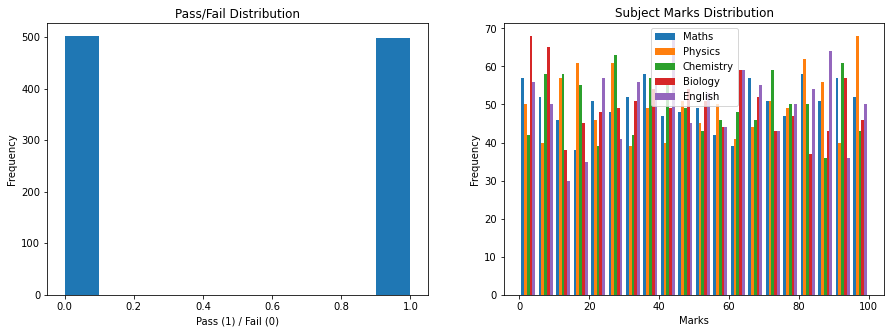

In [29]:
# Visualizing distribution of marks
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(pass_fail)
plt.title('Pass/Fail Distribution')
plt.xlabel('Pass (1) / Fail (0)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data[['Maths', 'Physics', 'Chemistry', 'Biology', 'English']].values, bins=20, label=['Maths', 'Physics', 'Chemistry', 'Biology', 'English'])
plt.title('Subject Marks Distribution')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [30]:
# Splitting data into features and target
X = data[['Maths', 'Physics', 'Chemistry', 'Biology', 'English']]
y = data['Pass/Fail']

In [31]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
# Implementing Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Predictions
y_pred = model.predict(X_test)

In [34]:
# Model evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[109   0]
 [  0  91]]

Accuracy Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        91

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



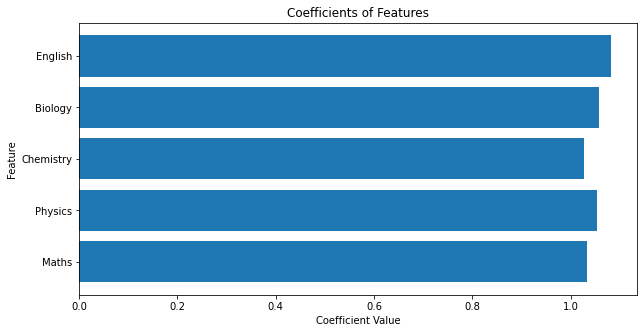

In [35]:
# Visualizing coefficients
plt.figure(figsize=(10, 5))
plt.barh(X.columns, model.coef_[0])
plt.title('Coefficients of Features')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [64]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
# Load dataset (replace 'data.csv' with your dataset)
data = pd.read_csv('framingham.csv')

In [66]:
data.head(20)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [ ]:
data.fillna(data.mean(), inplace=True)
print(data.isnull().sum())

In [ ]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(1e6, inplace=True)

In [68]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
data.dropna(inplace=True)

# Check for values too large for float64 dtype
print("Max values in dataset:")
print(data.max())


Max values in dataset:
male                 1.0
age                 70.0
education            4.0
currentSmoker        1.0
cigsPerDay          70.0
BPMeds               1.0
prevalentStroke      1.0
prevalentHyp         1.0
diabetes             1.0
totChol            600.0
sysBP              295.0
diaBP              142.5
BMI                 56.8
heartRate          143.0
glucose            394.0
TenYearCHD           1.0
dtype: float64


In [72]:
# Data preprocessing
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [73]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Feature scaling (if necessary)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [90]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[602   8]
 [112  10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.56      0.08      0.14       122

    accuracy                           0.84       732
   macro avg       0.70      0.53      0.53       732
weighted avg       0.80      0.84      0.78       732



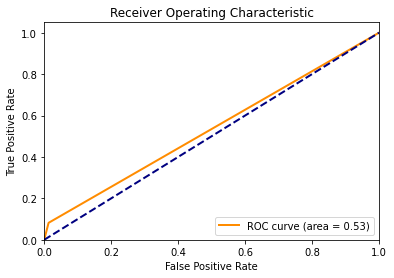

In [91]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
